In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
import pandas as pd

# Load the file with tab ('\t') separator
file_path = "OdorCAS.csv"
df = pd.read_csv(file_path, sep="\t", dtype=str)

# Step 1: Rename CAS column
df.rename(columns={'Unnamed: 0': 'Cas_Number'}, inplace=True)
print("CAS column renamed.")

# Identify duplicate CAS numbers
duplicate_cas = df[df.duplicated(subset=['Cas_Number'], keep=False)]
print(f"Total duplicate CAS values: {duplicate_cas['Cas_Number'].nunique()}")

# Step 2: Check if duplicates have different odor descriptors
def has_different_odor_descriptors(sub_df):
    return not sub_df.iloc[:, 1:].duplicated().all()  # Check if all odor descriptors are identical

# Group by CAS and filter out the ones with identical odor descriptors
unique_cas = duplicate_cas.groupby('Cas_Number').filter(has_different_odor_descriptors)
removed_cas = set(duplicate_cas['Cas_Number']) - set(unique_cas['Cas_Number'])
print(f"Removed {len(removed_cas)} CAS values where all odor descriptors were identical.")

# Keep only unique CAS entries where duplicates had different descriptors
df = pd.concat([df[~df['Cas_Number'].isin(removed_cas)], unique_cas]).drop_duplicates()

# Step 3: Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
print("Column names standardized.")

# Step 4: Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

# Step 5: Remove duplicate odor descriptor columns only if all values are identical
def has_identical_values(col):
    return df[col].nunique() == 1  # Checks if the column has only one unique value

# Identify duplicate columns
duplicate_columns = df.T.duplicated(keep=False)
identical_columns = [col for col in df.columns[1:] if duplicate_columns[col] and has_identical_values(col)]

# Drop identical duplicate columns
df = df.drop(columns=identical_columns)
print(f"Removed {len(identical_columns)} duplicate odor descriptor columns with identical values.")

# Step 6: Analyze distribution of odor descriptors
odor_distribution = df.iloc[:, 1:].sum().sort_values(ascending=False)
print("Odor descriptor distribution analyzed.")

# Step 7: Save the cleaned dataset to a single final CSV
df.to_csv("OdorCAS_preprocessed.csv", index=False)
print("Preprocessing complete. Cleaned dataset saved as 'OdorCAS_preprocessed.csv'.")


CAS column renamed.
Total duplicate CAS values: 75
Removed 0 CAS values where all odor descriptors were identical.
Column names standardized.
Total missing values: 0
Removed 0 duplicate odor descriptor columns with identical values.
Odor descriptor distribution analyzed.
Preprocessing complete. Cleaned dataset saved as 'OdorCAS_preprocessed.csv'.


In [6]:
odor_cas_df = pd.read_csv("OdorCAS_preprocessed.csv")

In [7]:
odor_cas_df.head()

,cas_number,acetique,agrume,aldehyde,alliace,amande_amere,animal,anise,baie,balsamique,...,verveine,vetiver,vin,vinaigre,violette,wasabi,whisky,yaourt,ylang_ylang,zeste_citron
0,50-70-4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51-67-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,56-12-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,56-40-6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56-41-7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
odor_cas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3841 entries, 0 to 3840
Columns: 395 entries, cas_number to zeste_citron
dtypes: int64(394), object(1)
memory usage: 11.6+ MB


### Analysing the preprocessed data 

In [10]:
# Load the dataset
file_path = "raw_data/OdorCAS_preprocessed.csv"
df = pd.read_csv(file_path)

C:\Users\suman\AppData\Local\Temp\ipykernel_28228\661604904.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=odor_counts[:20].index, y=odor_counts[:20].values, palette="viridis")


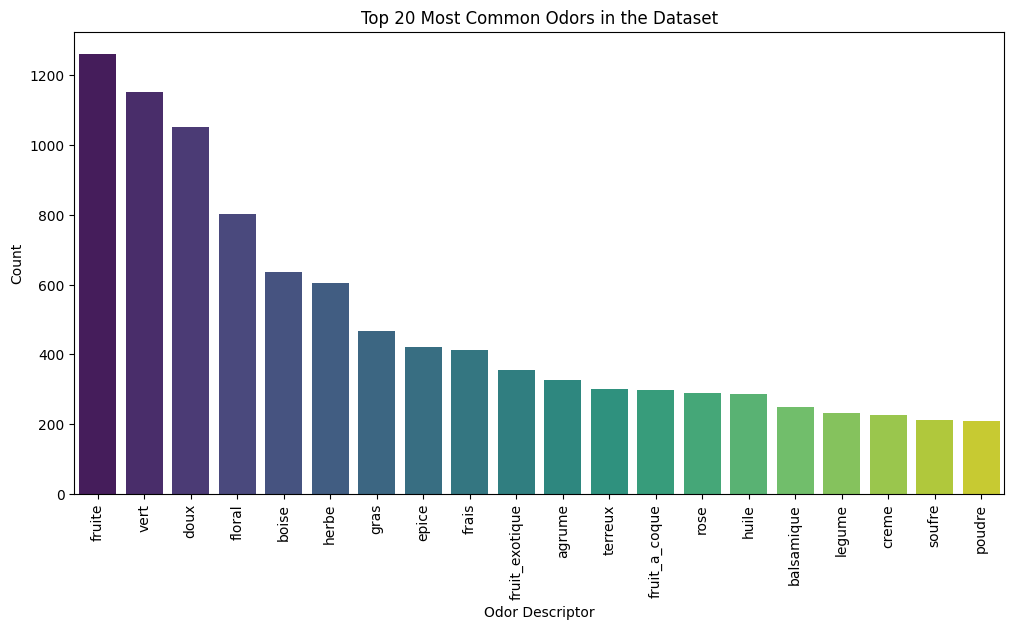

In [11]:
# Count the occurrences of each odor descriptor (excluding 'cas_number')
odor_counts = df.iloc[:, 1:].sum().sort_values(ascending=False)

# Plot the top 20 most common odors
plt.figure(figsize=(12, 6))
sns.barplot(x=odor_counts[:20].index, y=odor_counts[:20].values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Odor Descriptor")
plt.ylabel("Count")
plt.title("Top 20 Most Common Odors in the Dataset")
plt.show()


### Co-occurrence Analysis: Which odors frequently appear together?

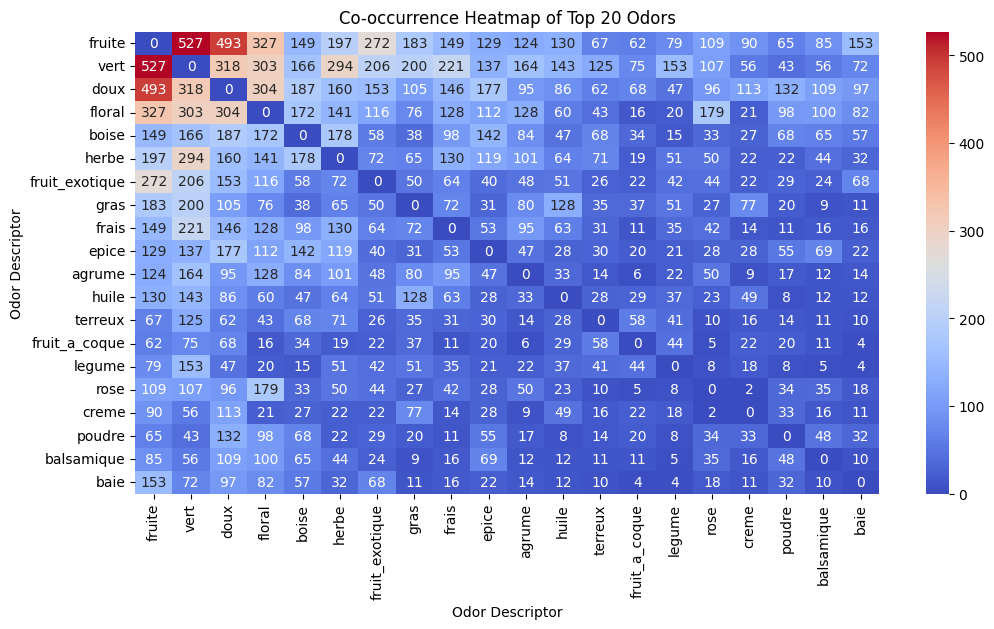

In [ ]:
# Compute the co-occurrence matrix for odor descriptors (excluding 'cas_number')
co_occurrence_matrix = df.iloc[:, 1:].T.dot(df.iloc[:, 1:])

# Set diagonal to zero to remove self-co-occurrence
np.fill_diagonal(co_occurrence_matrix.values, 0)

# Select the top 20 most co-occurring odors
top_odors = co_occurrence_matrix.sum(axis=1).sort_values(ascending=False).index[:20]

# Plot the co-occurrence heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(co_occurrence_matrix.loc[top_odors, top_odors], cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Co-occurrence Heatmap of Top 20 Odors")
plt.xlabel("Odor Descriptor")
plt.ylabel("Odor Descriptor")
plt.show()


- Brighter colors (red) indicate stronger co-occurrence.
- Darker colors (blue) indicate less frequent co-occurrence.

### Correlation Analysis: Which odors are highly correlated?

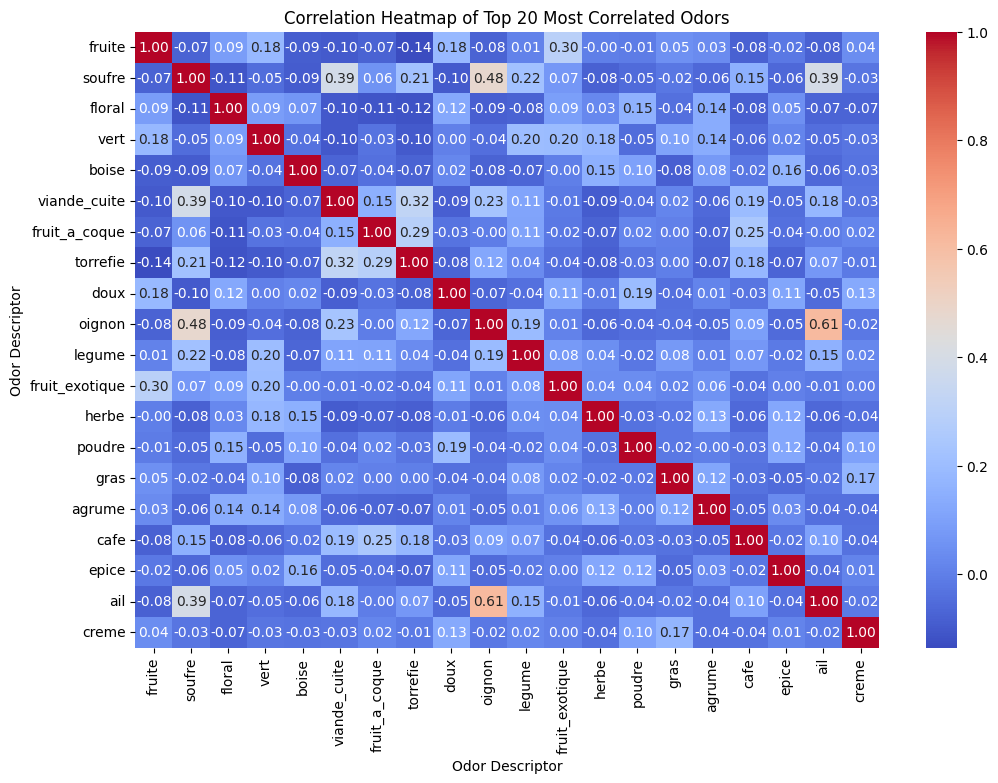

In [13]:
# Compute the correlation matrix (excluding 'cas_number')
correlation_matrix = df.iloc[:, 1:].corr(method="pearson")

# Select the top 20 odors based on their overall correlation strength
top_odors_corr = correlation_matrix.abs().sum(axis=1).sort_values(ascending=False).index[:20]

# Plot the correlation heatmap for the top 20 most correlated odors
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.loc[top_odors_corr, top_odors_corr], cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Top 20 Most Correlated Odors")
plt.xlabel("Odor Descriptor")
plt.ylabel("Odor Descriptor")
plt.show()


- Red indicates strong positive correlation (odors often appear together).
- Blue indicates strong negative correlation (rare, since it's binary data).

### Highly correlated odor pairs extracted from the matrix

In [14]:
# Extract highly correlated odor pairs
threshold = 0.5  # Define a strong correlation threshold
correlated_pairs = (correlation_matrix.abs() > threshold).stack()
high_corr_pairs = correlated_pairs[correlated_pairs].reset_index()
high_corr_pairs.columns = ["Odor 1", "Odor 2", "Correlation"]
high_corr_pairs = high_corr_pairs[high_corr_pairs["Odor 1"] != high_corr_pairs["Odor 2"]]  # Remove self-correlations

# Keep only unique pairs (since correlation matrix is symmetric)
high_corr_pairs = high_corr_pairs.loc[high_corr_pairs["Odor 1"] < high_corr_pairs["Odor 2"]]
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

# Display top 10 most correlated odor pairs
print(high_corr_pairs.head(10))


          Odor 1   Odor 2  Correlation
86           ail   oignon         True
95    ammoniaque  poisson         True
154        chene    sapin         True
158     chicoree  praline         True
173   citrouille   persil         True
191        datte  pruneau         True
194  dinde_cuite   huitre         True
